### Definition of popular

- share count
- like count
- comment count
- the rate of all 3 above with respect to play count

### Hypothesis: Length of videos (coupled with music and content) explains popularity of TikTok

Given people's short attention span, TikTok's built-in video recording feature is capped at 15s to encourage users to be more creative in grabbing attention through content
(i.e. catchy music, duet, challenges etc.)

There are methods to upload > 15s and > 60s but with the following video limitations:
- File Size: Videos can be up to 287 MB for iOS devices and 72 MB for Android. Ads can be up to 500 MB.
- Orientation: TikTok is designed for showcasing vertical video, but you can change it to horizontal if you want.
- Dimensions: TikTok can handle up to standard HD dimensions (1080 x 1920)
- Aspect Ratio: TikTok videos are normally formatted in standard smartphone aspect ratio (9:16). You can also make 1:1 videos but these are less common and won’t fir the entire screen.
- File type: User can upload .mp4 and .mov file types. Ads support .avi and .gif files

Hypothesis: Despite TikTok increasing the duration of videos, 15 seconds videos is still the reason why TikTok videos are popular. We should see higher metrics for videos are 15 seconds duration.

- videos with duration more than 15s perform better in terms of avg. share rate and like rate
    - not verified videos have higher avg. share rate in general
    - but verified videos have higher like rate in general
- for verified videos, 14s long videos have highest avg. comment rate but it is probably a viral video pulling the average up
    - not verified videos have higher avg. comment rate in general
    - could be because users tag their friends in comments for not verified videos more

hence, hypothesis is rejected because videos longer than 15s are performing better on average

## Import Packages

In [2]:
import json
import numpy as np
import pandas as pd
from clean import CleanData
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

## Read Data

In [3]:
data = json.load(open('./data/trending.json', encoding="utf8"))
data = data['collector']
toParse = pd.json_normalize(data)
df = CleanData(toParse)
df.process_the_data()
df.summary_of_data()
df_clean = df.dfm

Missing Data:
None

Data Time Period:
Start Date: 2020-09-22 14:22:38
  End Date: 2020-12-21 03:18:36
 Timedelta: 89 days 12:55:58


## Segementation

In [7]:
df_clean = df.dfm
# df_clean.sort_values(by=['likeCount'],ascending=False).head(1).T
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       1000 non-null   object        
 1   text                     1000 non-null   object        
 2   createTime               1000 non-null   datetime64[ns]
 3   webVideoUrl              1000 non-null   object        
 4   likeCount                1000 non-null   int64         
 5   shareCount               1000 non-null   int64         
 6   playCount                1000 non-null   int64         
 7   commentCount             1000 non-null   int64         
 8   downloaded               1000 non-null   bool          
 9   mentions                 1000 non-null   object        
 10  hashtags                 1000 non-null   object        
 11  authorMeta.id            1000 non-null   object        
 12  authorMeta.secUid        1000 non-n

In [4]:
segmentDf = df_clean[['authorMeta.name','authorMeta.verified','shareRate','likeRate','commentRate','playCount','shareCount','likeCount','commentCount']]
segmentDf = segmentDf.groupby(['authorMeta.name','authorMeta.verified'],as_index=False).agg(np.mean)
segmentDf = segmentDf.sort_values(by='likeRate',ascending=False)#.head(3).T
segmentDf.head(3).T

,57,399,595
authorMeta.name,anwarali0125,l3fty_fr3ak,reus.fx
authorMeta.verified,False,False,False
shareRate,0.003181,0.020488,0.017623
likeRate,0.485684,0.446655,0.375128
commentRate,0.008484,0.011573,0.007987
playCount,943.0,55300.0,232950.0
shareCount,3.0,1133.0,4390.0
likeCount,458.0,24700.0,87850.0
commentCount,8.0,640.0,1832.0


In [5]:
segmentDf['authorMeta.verified'].unique()

array([False,  True])

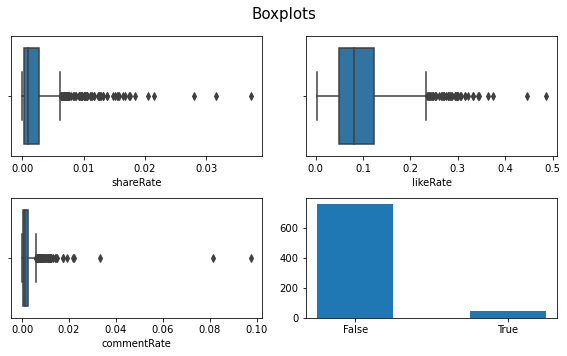

In [7]:
fig = plt.figure(figsize=(8, 5), tight_layout=True)
plt.suptitle('Boxplots', fontsize=15)
fig.add_subplot(221)
sns.boxplot(x='shareRate', data=segmentDf)
fig.add_subplot(222)
sns.boxplot(x='likeRate', data=segmentDf)
fig.add_subplot(223)
sns.boxplot(x='commentRate', data=segmentDf)
ax = fig.add_subplot(224)

categories = segmentDf['authorMeta.verified'].unique()
counts = segmentDf['authorMeta.verified'].value_counts()
pos = [0,1]
ax.bar(pos,counts,width=0.5)

ax.set_xticks(pos)
ax.set_xticklabels(categories)

plt.show()

## EDA

### Old - Plot distribution of video creation between data time period

In [8]:
df_clean[['createTime']].groupby(df_clean["createTime"].dt.month).count().transpose()

createTime,9,10,11,12
createTime,80,325,311,284


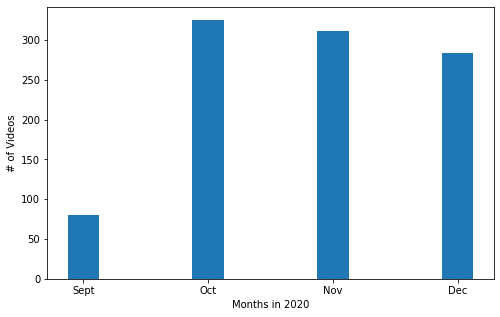

In [9]:
pivot_df = df_clean[['createTime']].groupby(df_clean["createTime"].dt.month).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
pivot_df = pivot_df.rename(columns={"createTime": "count"})
pivot_df = pivot_df.reset_index()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
x = pivot_df['createTime']
y = pivot_df['count']

ax.bar(x,y,width=0.25)
ax.set_xticks(np.arange(min(x), max(x)+1, 1))
ax.set_xticklabels(['Sept','Oct','Nov','Dec'])
ax.set_xlabel('Months in 2020')
ax.set_ylabel('# of Videos')
plt.show()

### Old - Plot distribution of video lengths

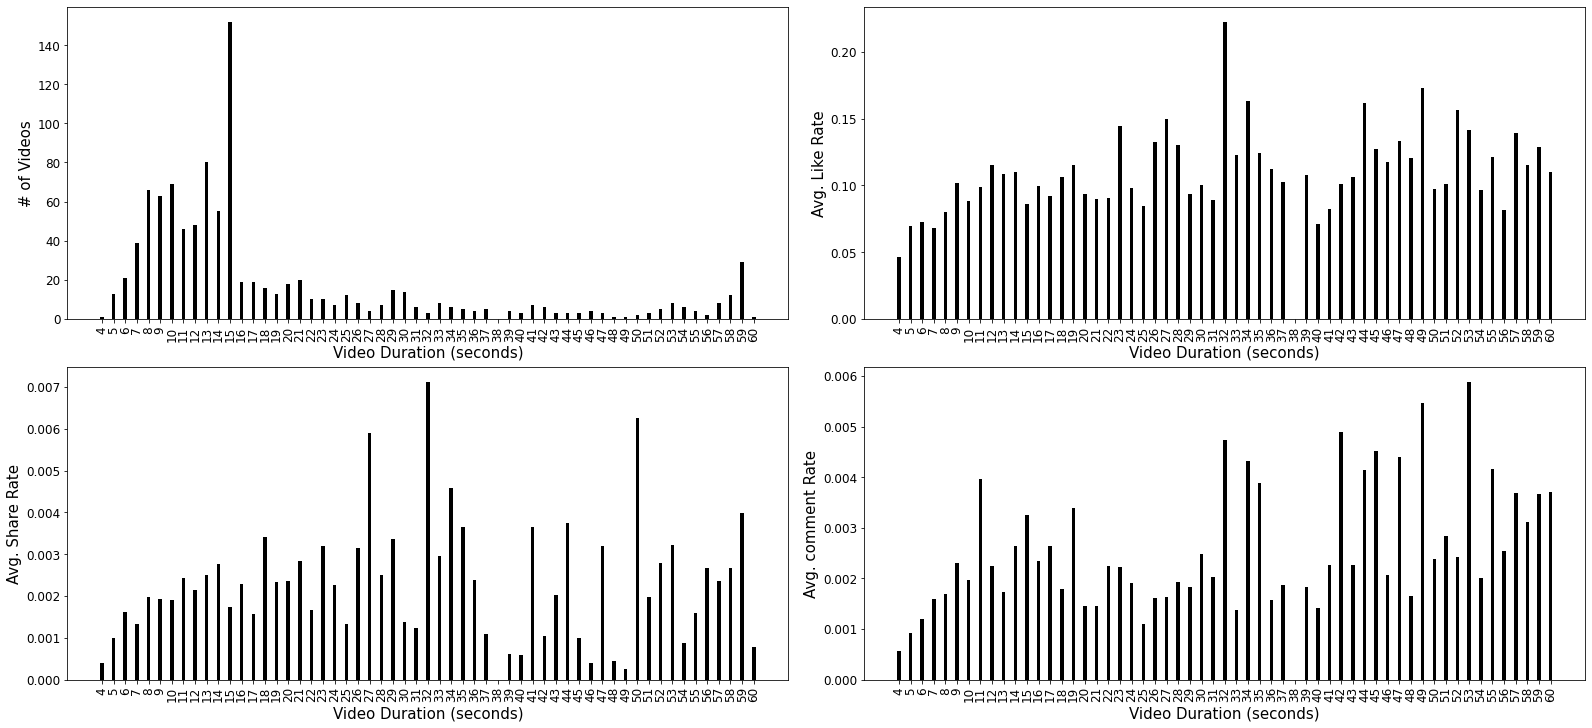

In [10]:
count_df = df_clean[['videoMeta.duration']].groupby(df_clean["videoMeta.duration"]).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
count_df = count_df.rename(columns={"videoMeta.duration": "count"})
count_df = count_df.reset_index()

avg_df = df_clean[['videoMeta.duration','likeRate','shareRate','commentRate']]
avg_df = avg_df.groupby(['videoMeta.duration'],as_index=False).agg([np.mean]).reset_index()
avg_df.columns = avg_df.columns.droplevel(-1)
# avg_df.sort_values(by='likeCount',ascending=False).head(3).T
# avg_df.head()

fig = plt.figure(figsize=(22,10),constrained_layout=True)
bar_width = 0.3

ax1 = fig.add_subplot(221)
x = count_df['videoMeta.duration']
y = count_df['count']

ax1.bar(x,y, color='k', width=bar_width)
ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax1.set_ylabel('# of Videos', fontdict={'fontsize': 15})
ax1.tick_params(axis='both', which='major', labelsize=12)

# ax1.bar([15], count_df[count_df['videoMeta.duration'] == 15]['count'].iloc[0], color='r', width=bar_width)

ax2 = fig.add_subplot(222)
x = avg_df['videoMeta.duration']
y = avg_df['likeRate']

ax2.bar(x,y,color='k', width=bar_width)
ax2.set_xticks(np.arange(min(x), max(x)+1, 1))
ax2.set_xticklabels(ax2.get_xticks(),rotation=90)
ax2.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax2.set_ylabel('Avg. Like Rate', fontdict={'fontsize': 15})
ax2.tick_params(axis='both', which='major', labelsize=12)

# target = [9,40]
# ax2.bar(target, avg_df[avg_df['videoMeta.duration'].isin(target)]['likeRate'], color='r', width=bar_width)

ax3 = fig.add_subplot(223)
x = avg_df['videoMeta.duration']
y = avg_df['shareRate']

ax3.bar(x,y,color='k', width=bar_width)
ax3.set_xticks(np.arange(min(x), max(x)+1, 1))
ax3.set_xticklabels(ax3.get_xticks(),rotation=90)
ax3.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax3.set_ylabel('Avg. Share Rate', fontdict={'fontsize': 15})
ax3.tick_params(axis='both', which='major', labelsize=12)

# target = [36,40]
# ax3.bar(target, avg_df[avg_df['videoMeta.duration'].isin(target)]['shareRate'], color='r', width=bar_width)

ax4 = fig.add_subplot(224)
x = avg_df['videoMeta.duration']
y = avg_df['commentRate']

ax4.bar(x,y,color='k', width=bar_width)
ax4.set_xticks(np.arange(min(x), max(x)+1, 1))
ax4.set_xticklabels(ax4.get_xticks(),rotation=90)
ax4.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax4.set_ylabel('Avg. comment Rate', fontdict={'fontsize': 15})
ax4.tick_params(axis='both', which='major', labelsize=12)

# target = [9]
# ax4.bar(target, avg_df[avg_df['videoMeta.duration'].isin(target)]['commentRate'], color='r', width=bar_width)

plt.show()

### Filter and aggregate data

In [4]:
filter_df = df_clean[['createTime','videoMeta.duration','authorMeta.verified','shareCount','likeCount','commentCount','playCount','shareRate','likeRate','commentRate']]
filter_df['videoMeta.duration_segment'] = filter_df['videoMeta.duration'].apply(lambda x: '<= 15' if x <= 15 else '> 15 and <= 30' if x > 15 and x <= 30 else '> 30 and <= 45' if x > 30 and x <= 45 else '> 45 and <= 60' if x > 45 and x <= 60 else '> 60') 
filter_df['date'] = filter_df['createTime'].dt.date
filter_df.drop(['createTime'],axis=1,inplace=True)
filter_df.head()


,videoMeta.duration,authorMeta.verified,shareCount,likeCount,commentCount,playCount,shareRate,likeRate,commentRate,videoMeta.duration_segment,date
0,15,False,50,3710,68,44800,0.001116,0.082812,0.001518,<= 15,2020-12-17
1,11,False,1817,55700,936,838100,0.002168,0.066460,0.001117,<= 15,2020-09-23
2,19,False,21100,936200,27100,15300000,0.001379,0.061190,0.001771,> 15 and <= 30,2020-11-24
3,13,False,197,12900,143,94900,0.002076,0.135933,0.001507,<= 15,2020-12-05
4,22,False,198,8805,52,115300,0.001717,0.076366,0.000451,> 15 and <= 30,2020-12-13


In [6]:
segment_type = 'video length groups'
# segment_type = 'without date'
# segment_type = 'avg rate for video length and verified status'
# segment_type = 'avg count for video length and verified status'

if segment_type == 'video length groups':
    count_df = filter_df.drop(['authorMeta.verified','shareCount','likeCount','commentCount','playCount','shareRate','likeRate','commentRate'],axis=1,inplace=False)
    count_df = count_df.groupby(['videoMeta.duration_segment']).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
    count_df = count_df.rename(columns={"videoMeta.duration": "numVideos"})
    count_df = count_df.reset_index()

    avg_df = filter_df.groupby(['videoMeta.duration_segment'],as_index=False)['shareCount','likeCount','commentCount','playCount','shareRate','likeRate','commentRate'].agg([np.mean]).reset_index()
    avg_df.columns = avg_df.columns.droplevel(-1)
    # avg_df.sort_values(by='likeCount',ascending=False).head(3).T
    avg_df = avg_df.merge(count_df,on=['videoMeta.duration_segment'],how='left')

elif segment_type == 'time series':
    count_df = filter_df.drop(['authorMeta.verified','shareRate','likeRate','commentRate'],axis=1,inplace=False)
    count_df = count_df.groupby(['date','videoMeta.duration_segment']).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
    count_df = count_df.rename(columns={"videoMeta.duration": "numVideos"})
    count_df = count_df.reset_index()

    avg_df = filter_df.groupby(['date','videoMeta.duration_segment'],as_index=False)['shareRate','likeRate','commentRate'].agg([np.mean]).reset_index()
    avg_df.columns = avg_df.columns.droplevel(-1)
    # avg_df.sort_values(by='likeCount',ascending=False).head(3).T
    avg_df = avg_df.merge(count_df,on=['date','videoMeta.duration_segment'],how='left')

elif segment_type == 'avg rate for video length and verified status':
    count_df = filter_df[['videoMeta.duration','shareRate','authorMeta.verified']]
    count_df = count_df.groupby(['videoMeta.duration','authorMeta.verified']).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
    count_df = count_df.rename(columns={"shareRate": "numVideos"})
    count_df = count_df.reset_index()

    avg_df = filter_df.groupby(['videoMeta.duration','authorMeta.verified'],as_index=False)['shareCount','likeCount','commentCount','playCount','shareRate','likeRate','commentRate'].agg([np.mean]).reset_index()
    avg_df.columns = avg_df.columns.droplevel(-1)
    # avg_df.sort_values(by='likeCount',ascending=False).head(3).T
    avg_df = avg_df.merge(count_df,on=['videoMeta.duration','authorMeta.verified'],how='left')

elif segment_type == 'avg count for video length and verified status':
    count_df = filter_df[['videoMeta.duration','shareRate','authorMeta.verified']]
    count_df = count_df.groupby(['videoMeta.duration','authorMeta.verified']).count()#.sort_values(by='videoMeta.duration',axis=1)#.plot(kind="bar", legend=False)
    count_df = count_df.rename(columns={"shareRate": "numVideos"})
    count_df = count_df.reset_index()

    avg_df = filter_df.groupby(['videoMeta.duration','authorMeta.verified'],as_index=False)['shareCount','likeCount','commentCount','playCount'].agg([np.mean]).reset_index()
    avg_df.columns = avg_df.columns.droplevel(-1)
    # avg_df.sort_values(by='likeCount',ascending=False).head(3).T
    avg_df = avg_df.merge(count_df,on=['videoMeta.duration','authorMeta.verified'],how='left')

avg_df

/var/folders/fr/m4v_69gx29dghgljd9_f6r4w0000gn/T/ipykernel_7785/397102117.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_df = filter_df.groupby(['videoMeta.duration_segment'],as_index=False)['shareCount','likeCount','commentCount','playCount','shareRate','likeRate','commentRate'].agg([np.mean]).reset_index()


,videoMeta.duration_segment,shareCount,likeCount,commentCount,playCount,shareRate,likeRate,commentRate,numVideos,date
0,<= 15,2213.274119,121396.038285,1613.381317,1.293347e+06,0.002010,0.093074,0.002389,653,653
1,> 15 and <= 30,1533.750000,55371.927083,715.083333,6.522860e+05,0.002470,0.102895,0.002026,192,192
2,> 30 and <= 45,1222.909091,64967.000000,474.045455,6.189219e+05,0.002566,0.117579,0.002847,66,66
3,> 45 and <= 60,953.943820,29292.528090,555.213483,2.086460e+05,0.002861,0.125266,0.003499,89,89


In [ ]:
avg_df.to_csv('segmented_avg_df.csv',index=False)

### Plot Time Series

In [12]:
def plot_scatter(ax, x, y, color, edgecolors):
    ax.scatter(x,y, color=color,edgecolors=edgecolors,linewidths=0.5,s=100)
    # ax.set_xlabel(x_label, fontdict={'fontsize': 15})
    # ax.set_ylabel(y_label, fontdict={'fontsize': 15})
    # ax.set_title(title, fontdict={'fontsize': 15})

fig = plt.figure(figsize=(20,10),constrained_layout=True)

ax1 = fig.add_subplot(111)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_xlim([min(avg_df['date'])  - timedelta(days=1), max(avg_df['date'])])
ax1.set_ylim([0,avg_df['shareRate'].max()+0.0025])

segment_1 = avg_df[avg_df['videoMeta.duration_segment'] == '<= 15']
plot_scatter(ax1, segment_1['date'], segment_1['shareRate'], color='blue', edgecolors='b')

segment_2 = avg_df[avg_df['videoMeta.duration_segment'] == '> 15 and <= 30']
plot_scatter(ax1, segment_2['date'], segment_2['shareRate'], color='yellow', edgecolors='b')

segment_3 = avg_df[avg_df['videoMeta.duration_segment'] == '> 30 and <= 45']
plot_scatter(ax1, segment_3['date'], segment_3['shareRate'], color='green', edgecolors='b')

segment_4 = avg_df[avg_df['videoMeta.duration_segment'] == '> 45 and <= 60']
plot_scatter(ax1, segment_4['date'], segment_4['shareRate'], color='red', edgecolors='b')

ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

### Plot y = share rate, x = video length, z = verified

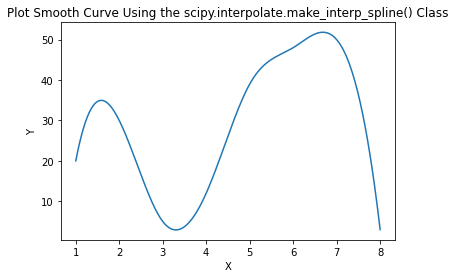

In [21]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([20, 30, 5, 12, 39, 48, 50, 3])
 
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [26]:
def plot_line(ax1, response, response_label, edgecolors, area_color1, area_color2, alpha, legend=False, spines=False, xaxis=False):
    x = avg_df['videoMeta.duration']
    y = avg_df[response]
    ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
    ax1.set_xticklabels([''] * len(np.arange(min(x), max(x)+1, 1)))
    # ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
    # ax1.set_yticks(np.arange(0, max(y)+0.0005, 0.001))
    ax1.set_ylim([min(y),max(y)+0.001])

    x = avg_df[avg_df['authorMeta.verified'] == False]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == False][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.plot(x,y,color=edgecolors,linewidth=1.5, label='Unverified')
    l1 = ax1.fill_between(x,y, color=area_color1,alpha=alpha)

    x = avg_df[avg_df['authorMeta.verified'] == True]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == True][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.plot(x,y,color=edgecolors,linewidth=1.5, label='Verified')
    l2 = ax1.fill_between(x,y,color=area_color2,alpha=alpha)    
    
    if legend == True:
        ax1.legend(handles=[l1,l2], labels=['Not Verified','Verified'], edgecolor='black')

    # ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 20})
    ax1.set_ylabel(f'{response_label}', fontdict={'fontsize': 14})
    # ax1.set_title(f'Distribution of {response_label}', fontdict={'fontsize': 25})
    
    if spines == True:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
    
    if xaxis == True:
        ax1.spines['bottom'].set_visible(False)

    ax1.tick_params(axis='both', which='major', labelsize=12.5)

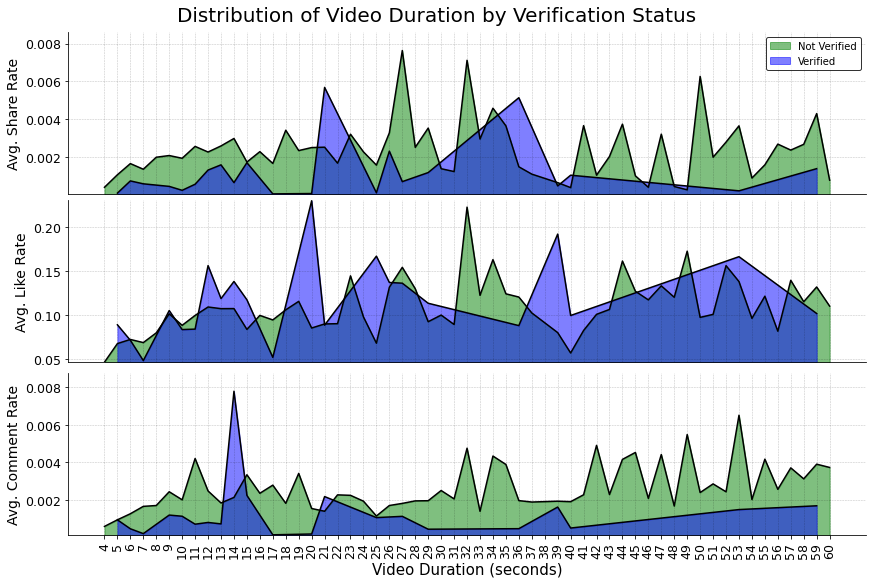

In [27]:
fig = plt.figure(figsize=(12,8),constrained_layout=True)
fig.suptitle('Distribution of Video Duration by Verification Status', fontsize=20)

ax1 = fig.add_subplot(311)
plot_line(ax1, 'shareRate', 'Avg. Share Rate', 'k', 'g', 'b', 0.5, legend=True, spines=True)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax1.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

ax2 = fig.add_subplot(312)
plot_line(ax2, 'likeRate', 'Avg. Like Rate', 'k', 'g', 'b', 0.5, spines=True)
ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax2.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

ax3 = fig.add_subplot(313)
plot_line(ax3, 'commentRate', 'Avg. Comment Rate', 'k', 'g', 'b', 0.5, spines=True)
# ax3.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax3.set_xticklabels(ax3.get_xticks(),rotation=90)
ax3.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax3.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

# ax4 = fig.add_subplot(414)
# plot_line(ax4, 'numVideos', '# of Videos', 'k', 'g', 'b', 0.5)
# # ax4.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 20})
# ax4.set_xticklabels(ax4.get_xticks(),rotation=90)

# ax5 = fig.add_subplot(425)
# plot_line(ax5, 'shareCount', 'Avg. Share Count', 'k', 'r', 'b')

# ax6 = fig.add_subplot(426)
# plot_line(ax6, 'likeCount', 'Avg. Like Count', 'k', 'r', 'b')

# ax7 = fig.add_subplot(427)
# plot_line(ax7, 'commentCount', 'Avg. Comment Count', 'k', 'r', 'b')

# ax8 = fig.add_subplot(428)
# plot_line(ax8, 'playCount', 'Avg. Play Count', 'k', 'r', 'b')
plt.savefig('video_duration.pdf')
plt.show()

In [36]:
def plot_line_2(ax1, response, response_label, edgecolors, area_color1, area_color2):
    x = avg_df['videoMeta.duration']
    y = avg_df[response]
    ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
    ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
    # ax1.set_yticks(np.arange(0, max(y)+0.0005, 0.001))
    ax1.set_ylim([min(y),max(y)+0.001])

    x = avg_df[avg_df['authorMeta.verified'] == False]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == False][response]

    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)

    ax1.plot(X_,Y_,color=edgecolors,linewidth=1.5, label='Unverified')
    ax1.fill_between(X_,Y_, color=area_color1,alpha=0.1)

    x = avg_df[avg_df['authorMeta.verified'] == True]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == True][response]

    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)

    ax1.plot(X_,Y_,color=edgecolors,linewidth=1.5, label='Verified')
    ax1.fill_between(X_,Y_,color=area_color2,alpha=0.1)

    ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 20})
    ax1.set_ylabel(f'{response_label}', fontdict={'fontsize': 20})
    ax1.set_title(f'Distribution of {response_label}', fontdict={'fontsize': 25})

    ax1.tick_params(axis='both', which='major', labelsize=15)

# fig = plt.figure(figsize=(30,25),constrained_layout=True)
# ax1 = fig.add_subplot(421)
# plot_line_2(ax1, 'shareRate', 'Avg. Share Rate', 'k', 'r', 'b')

# ax2 = fig.add_subplot(422)
# plot_line_2(ax2, 'likeRate', 'Avg. Like Rate', 'k', 'r', 'b')

# ax3 = fig.add_subplot(423)
# plot_line_2(ax3, 'commentRate', 'Avg. Comment Rate', 'k', 'r', 'b')

# ax4 = fig.add_subplot(424)
# plot_line_2(ax4, 'numVideos', '# of Videos', 'k', 'r', 'b')

# ax5 = fig.add_subplot(425)
# plot_line_2(ax5, 'shareCount', 'Avg. Share Count', 'k', 'r', 'b')

# ax6 = fig.add_subplot(426)
# plot_line_2(ax6, 'likeCount', 'Avg. Like Count', 'k', 'r', 'b')

# ax7 = fig.add_subplot(427)
# plot_line_2(ax7, 'commentCount', 'Avg. Comment Count', 'k', 'r', 'b')

# ax8 = fig.add_subplot(428)
# plot_line_2(ax8, 'playCount', 'Avg. Play Count', 'k', 'r', 'b')

# plt.show()

In [34]:
def plot_bar(ax1, response, response_label, edgecolors, area_color1, area_color2, alpha, legend=False, spines=False, xaxis=False):
    x = avg_df['videoMeta.duration']
    y = avg_df[response]
    ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
    ax1.set_xticklabels([''] * len(np.arange(min(x), max(x)+1, 1)))
    # ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
    # ax1.set_yticks(np.arange(0, max(y)+0.0005, 0.001))
    ax1.set_ylim([min(y),max(y)+0.001])

    x = avg_df[avg_df['authorMeta.verified'] == False]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == False][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.bar(x,y,color='green',alpha=alpha)
    # l1 = ax1.fill_between(x,y, color=area_color1,alpha=alpha)

    x = avg_df[avg_df['authorMeta.verified'] == True]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == True][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.bar(x,y,color='blue',alpha=alpha)
    # l2 = ax1.fill_between(x,y,color=area_color2,alpha=alpha)    
    
    # if legend == True:
    #     ax1.legend(handles=[l1,l2], labels=['Not Verified','Verified'], edgecolor='black')

    # ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 20})
    ax1.set_ylabel(f'{response_label}', fontdict={'fontsize': 14})
    # ax1.set_title(f'Distribution of {response_label}', fontdict={'fontsize': 25})
    
    if spines == True:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
    
    if xaxis == True:
        ax1.spines['bottom'].set_visible(False)

    ax1.tick_params(axis='both', which='major', labelsize=12.5)

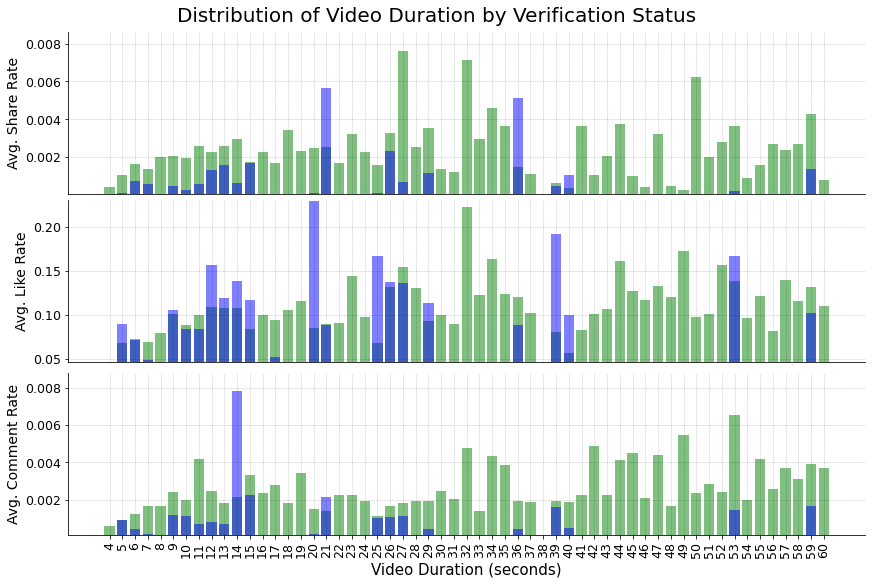

In [35]:
fig = plt.figure(figsize=(12,8),constrained_layout=True)
fig.suptitle('Distribution of Video Duration by Verification Status', fontsize=20)

ax1 = fig.add_subplot(311)
plot_bar(ax1, 'shareRate', 'Avg. Share Rate', 'k', 'g', 'b', 0.5, legend=True, spines=True)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax1.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

ax2 = fig.add_subplot(312)
plot_bar(ax2, 'likeRate', 'Avg. Like Rate', 'k', 'g', 'b', 0.5, spines=True)
ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax2.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

ax3 = fig.add_subplot(313)
plot_bar(ax3, 'commentRate', 'Avg. Comment Rate', 'k', 'g', 'b', 0.5, spines=True)
# ax3.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax3.set_xticklabels(ax3.get_xticks(),rotation=90)
ax3.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax3.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

plt.show()

In [39]:
def plot_bar(ax1, response, response_label, edgecolors, area_color1, area_color2, alpha, legend=False, spines=False, xaxis=False):
    x = avg_df['videoMeta.duration']
    y = avg_df[response]
    ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
    ax1.set_xticklabels([''] * len(np.arange(min(x), max(x)+1, 1)))
    # ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
    # ax1.set_yticks(np.arange(0, max(y)+0.0005, 0.001))
    ax1.set_ylim([min(y),max(y)+0.001])

    x1 = avg_df[avg_df['authorMeta.verified'] == False]['videoMeta.duration']
    y1 = avg_df[avg_df['authorMeta.verified'] == False][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

            # ax.bar(labels, men_means, width, yerr=men_std, label='Men')
            # ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
            #     label='Women')

    ax1.bar(x1,y1,label='Not Verified')
    # l1 = ax1.fill_between(x,y, color=area_color1,alpha=alpha)

    x2 = avg_df[avg_df['authorMeta.verified'] == True]['videoMeta.duration']
    y2 = avg_df[avg_df['authorMeta.verified'] == True][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.bar(x2,y2,bottom=y1,label='Verified')
    # l2 = ax1.fill_between(x,y,color=area_color2,alpha=alpha)    
    
    # if legend == True:
    #     ax1.legend(handles=[l1,l2], labels=['Not Verified','Verified'], edgecolor='black')

    # ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 20})
    ax1.set_ylabel(f'{response_label}', fontdict={'fontsize': 14})
    # ax1.set_title(f'Distribution of {response_label}', fontdict={'fontsize': 25})
    
    if spines == True:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
    
    if xaxis == True:
        ax1.spines['bottom'].set_visible(False)

    ax1.tick_params(axis='both', which='major', labelsize=12.5)

In [41]:
fig = plt.figure(figsize=(12,8),constrained_layout=True)
fig.suptitle('Distribution of Video Duration by Verification Status', fontsize=20)

ax1 = fig.add_subplot(311)
plot_bar(ax1, 'shareCount', 'Sum of Share Count', 'k', 'g', 'b', 0.5, legend=True, spines=True)
ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax1.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

ax2 = fig.add_subplot(312)
plot_bar(ax2, 'likeCount', 'Sum of Like Count', 'k', 'g', 'b', 0.5, spines=True)
ax2.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax2.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

ax3 = fig.add_subplot(313)
plot_bar(ax3, 'commentCount', 'Sum of Comment Count', 'k', 'g', 'b', 0.5, spines=True)
# ax3.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax3.set_xticklabels(ax3.get_xticks(),rotation=90)
ax3.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 15})
ax3.grid(color = 'k', linestyle = '--', linewidth = 0.5,alpha=0.25)

plt.show()

In [76]:
left_df = avg_df[avg_df['authorMeta.verified'] == False]
right_df = avg_df[avg_df['authorMeta.verified'] == True]

merge_df = pd.merge(left_df,right_df,on=['videoMeta.duration'],how='left')
merge_df['shareCount_y'] = merge_df['shareCount_y'].fillna(0)
merge_df['likeCount_y'] = merge_df['likeCount_y'].fillna(0)
merge_df['commentCount_y'] = merge_df['commentCount_y'].fillna(0)
merge_df['numVideos_y'] = merge_df['numVideos_y'].fillna(0)
merge_df.head()

,videoMeta.duration,authorMeta.verified_x,shareCount_x,likeCount_x,commentCount_x,playCount_x,numVideos_x,authorMeta.verified_y,shareCount_y,likeCount_y,commentCount_y,playCount_y,numVideos_y
0,4,False,19,2232,27,47900,1,NaN,0.0,0.0,0.0,NaN,0.0
1,5,False,14359,345156,4917,4246200,12,True,14.0,13800.0,142.0,155000.0,1.0
2,6,False,8601,180373,2272,2765437,20,True,1762.0,171500.0,1051.0,2400000.0,1.0
3,7,False,24937,559822,5954,6158700,38,True,14400.0,1200000.0,4454.0,24800000.0,1.0
4,8,False,233460,8200236,78118,71201728,66,NaN,0.0,0.0,0.0,NaN,0.0


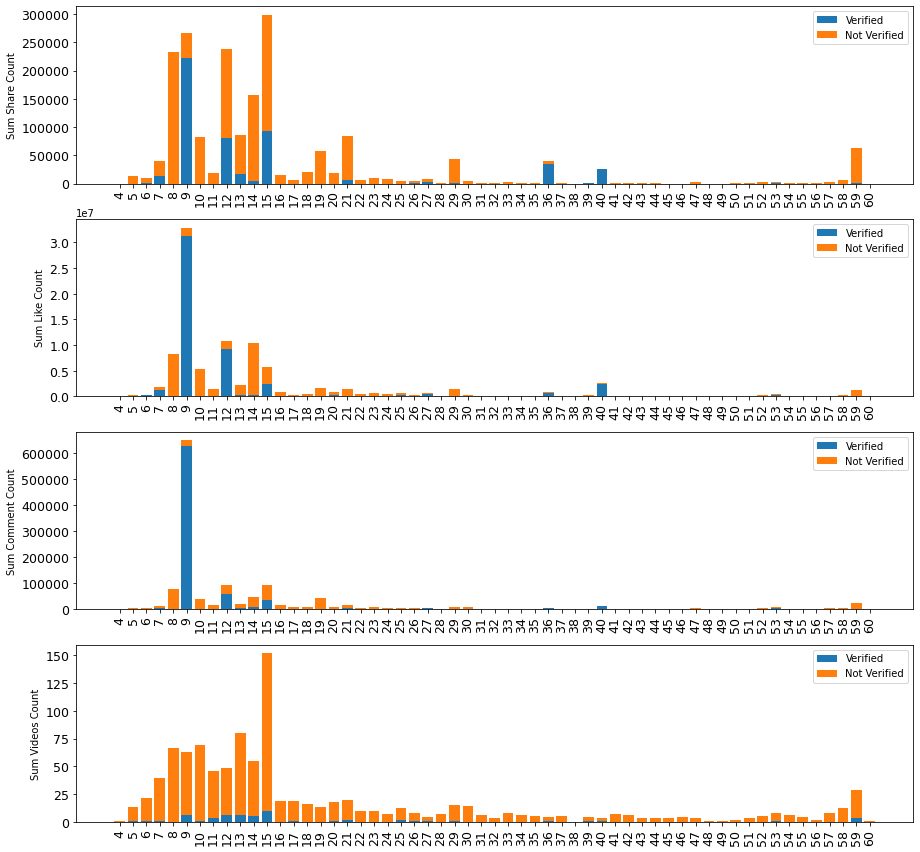

In [79]:
# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 35, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
# men_std = [2, 3, 4, 1, 2]
# women_std = [3, 5, 2, 3, 3]
# width = 0.35       # the width of the bars: can also be len(x) sequence

x1 = merge_df['videoMeta.duration']
y1 = merge_df['shareCount_x']

x2 = merge_df['videoMeta.duration']
y2 = merge_df['shareCount_y']

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(411)

ax.bar(x2, y2, label='Verified')
ax.bar(x1, y1, label='Not Verified', bottom=y2)

ax.set_xticks(np.arange(min(x1), max(x1)+1, 1))
ax.set_xticklabels(ax.get_xticks(),rotation=90)
ax.set_ylabel('Sum Share Count')
# ax.set_title('Scores by group and gender')
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12.5)
##############################
x1 = merge_df['videoMeta.duration']
y1 = merge_df['likeCount_x']

x2 = merge_df['videoMeta.duration']
y2 = merge_df['likeCount_y']

ax = fig.add_subplot(412)

ax.bar(x2, y2, label='Verified')
ax.bar(x1, y1, label='Not Verified', bottom=y2)

ax.set_xticks(np.arange(min(x1), max(x1)+1, 1))
ax.set_xticklabels(ax.get_xticks(),rotation=90)
ax.set_ylabel('Sum Like Count')
# ax.set_title('Scores by group and gender')
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12.5)
##############################
x1 = merge_df['videoMeta.duration']
y1 = merge_df['commentCount_x']

x2 = merge_df['videoMeta.duration']
y2 = merge_df['commentCount_y']

ax = fig.add_subplot(413)

ax.bar(x2, y2, label='Verified')
ax.bar(x1, y1, label='Not Verified', bottom=y2)

ax.set_xticks(np.arange(min(x1), max(x1)+1, 1))
ax.set_xticklabels(ax.get_xticks(),rotation=90)
ax.set_ylabel('Sum Comment Count')
# ax.set_title('Scores by group and gender')
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12.5)
 
##############################
x1 = merge_df['videoMeta.duration']
y1 = merge_df['numVideos_x']

x2 = merge_df['videoMeta.duration']
y2 = merge_df['numVideos_y']

ax = fig.add_subplot(414)
ax.bar(x2, y2, label='Verified')
ax.bar(x1, y1, label='Not Verified', bottom=y2)

ax.set_xticks(np.arange(min(x1), max(x1)+1, 1))
ax.set_xticklabels(ax.get_xticks(),rotation=90)
ax.set_ylabel('Sum Videos Count')
# ax.set_title('Scores by group and gender')
ax.legend()
ax.tick_params(axis='both', which='major', labelsize=12.5)

plt.show()